# Unsupervised Machine Learning
## KMeans Clustering


In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data ingestion

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Problem statement get similar customers based om their Income and Spending
### Step 2 - Perform basic data quality checks

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X (Income and Spending)

In [7]:
X = df[["Income", "Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


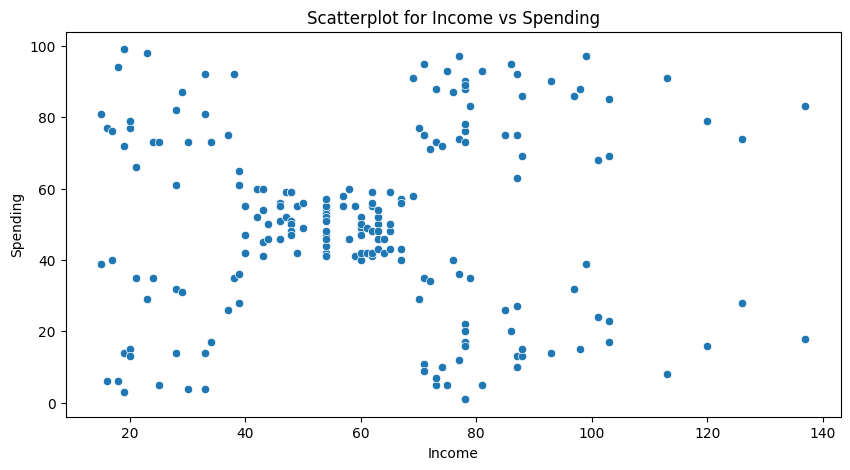

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X, x="Income", y="Spending")
plt.title("Scatterplot for Income vs Spending")
plt.show()

### Step 4 - Apply Preprocessing on X


In [10]:
X.dtypes

Income      int64
Spending    int64
dtype: object

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [16]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Step 5 - Deciding Optimum clusters based on inertia

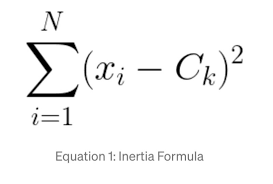

In [17]:
from sklearn.cluster import KMeans

In [18]:
inertias =[]
k = range(1, 15)
for i in k:
    km = KMeans(n_clusters = i, random_state= 42).fit(X_pre)
    ine = km.inertia_
    print(f"Clusters : {i}, Inertia : {ine:.2f}")
    inertias.append(ine)

Clusters : 1, Inertia : 400.00
Clusters : 2, Inertia : 273.67
Clusters : 3, Inertia : 157.70
Clusters : 4, Inertia : 109.23
Clusters : 5, Inertia : 65.57
Clusters : 6, Inertia : 60.13
Clusters : 7, Inertia : 49.67
Clusters : 8, Inertia : 37.32
Clusters : 9, Inertia : 32.50
Clusters : 10, Inertia : 30.06
Clusters : 11, Inertia : 26.76
Clusters : 12, Inertia : 26.23
Clusters : 13, Inertia : 23.19
Clusters : 14, Inertia : 21.20



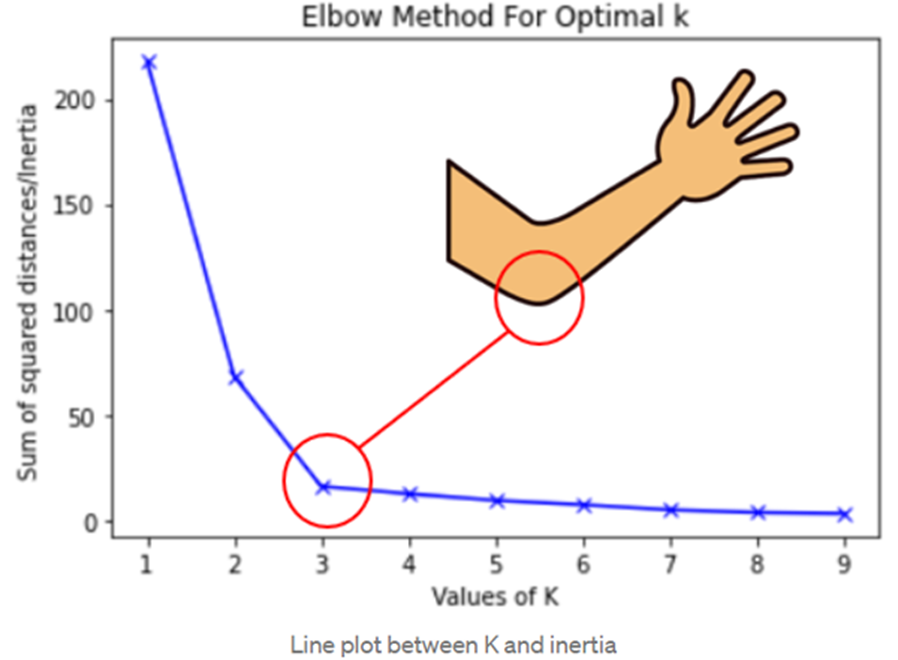

In [19]:
%pip install kneed[plot]

Note: you may need to restart the kernel to use updated packages.


In [21]:
from kneed import KneeLocator

In [23]:
kneedle = KneeLocator(k, inertias, curve="convex", direction="decreasing")
elbow_k = kneedle.elbow
elbow_k

np.int64(5)

In [24]:
best_inertia = inertias[elbow_k - 1]
best_inertia

65.56840815571681

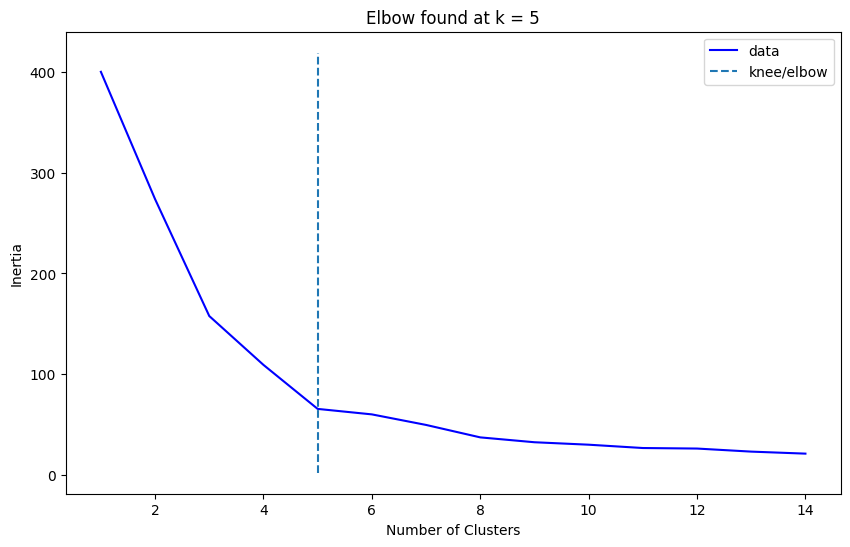

In [26]:
kneedle.plot_knee(
    figsize=(10, 6),
    xlabel="Number of Clusters",
    ylabel="Inertia",
    title = f"Elbow found at k = {elbow_k}"
)

### Step 5 fit best kmeans model with n_clusters  = 5

In [27]:
elbow_k

np.int64(5)

In [30]:
best_km = KMeans(n_clusters = elbow_k, random_state=42)
labels = best_km.fit_predict(X_pre)
labels


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

## Visualize Clusters

In [31]:
X1 = X.copy()

In [32]:
X1["Cluster"] = labels

In [33]:
X1.head()

,Income,Spending,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [34]:
X1[X1["Cluster"] == 0]

,Income,Spending,Cluster
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [35]:
X1[X1["Cluster"]==1]

,Income,Spending,Cluster
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [36]:
for i in range(elbow_k):
    print(f"Cluster Label : {i}")
    display(X1[X1["Cluster"] == i])
    print("\n===============================\n")


Cluster Label : 0


,Income,Spending,Cluster
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0




Cluster Label : 1


,Income,Spending,Cluster
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Cluster Label : 2


,Income,Spending,Cluster
1,15,81,2
3,16,77,2
5,17,76,2
7,18,94,2
9,19,72,2
11,19,99,2
13,20,77,2
15,20,79,2
17,21,66,2
19,23,98,2




Cluster Label : 3


,Income,Spending,Cluster
124,70,29,3
128,71,11,3
130,71,9,3
134,73,5,3
136,73,7,3
138,74,10,3
140,75,5,3
144,77,12,3
146,77,36,3
148,78,22,3




Cluster Label : 4


,Income,Spending,Cluster
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [37]:
X1.groupby(by="Cluster").describe().T


Cluster                 0           1          2           3          4
Income   count  81.000000   39.000000  22.000000   35.000000  23.000000
         mean   55.296296   86.538462  25.727273   88.200000  26.304348
         std     8.988109   16.312485   7.566731   16.399067   7.893811
         min    39.000000   69.000000  15.000000   70.000000  15.000000
         25%    48.000000   75.500000  19.250000   77.500000  19.500000
         50%    54.000000   79.000000  24.500000   85.000000  25.000000
         75%    62.000000   95.000000  32.250000   97.500000  33.000000
         max    76.000000  137.000000  39.000000  137.000000  39.000000
Spending count  81.000000   39.000000  22.000000   35.000000  23.000000
         mean   49.518519   82.128205  79.363636   17.114286  20.913043
         std     6.530909    9.364489  10.504174    9.952154  13.017167
         min    34.000000   63.000000  61.000000    1.000000   3.000000
         25%    44.000000   74.500000  73.000000   10.000000   9.500000
         50%    50.000000   83.000000  77.000000   16.000000  17.000000
         75%    55.000000   90.000000  85.750000   23.500000  33.500000
         max    61.000000   97.000000  99.000000   39.000000  40.000000

In [38]:
centroids = X1.groupby(by="Cluster").mean()
centroids

,Income,Spending
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


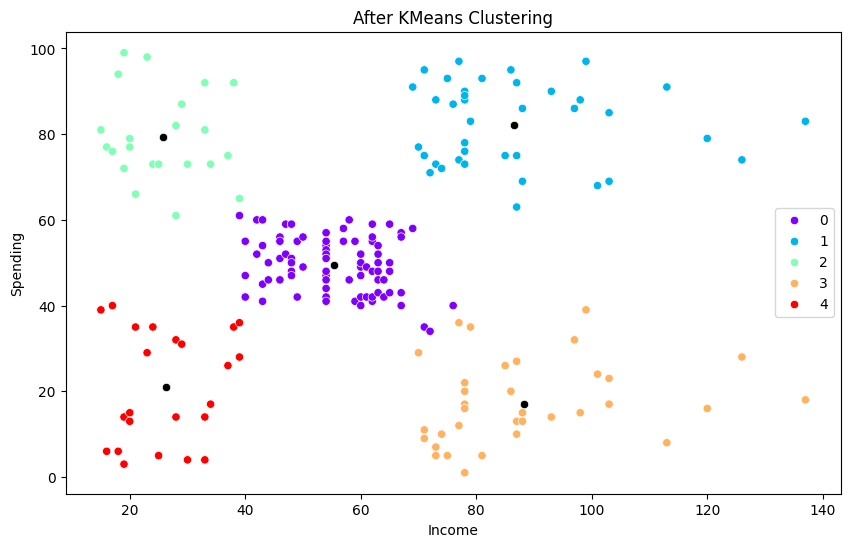

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X1, x="Income", y="Spending", hue="Cluster", palette = "rainbow")
sns.scatterplot(data=centroids, x="Income", y="Spending", color="black")
plt.title("After KMeans Clustering")
plt.show()


In [40]:
X1.to_csv("KMeansResult.csv", index=False)


## Agglomerative Clustering

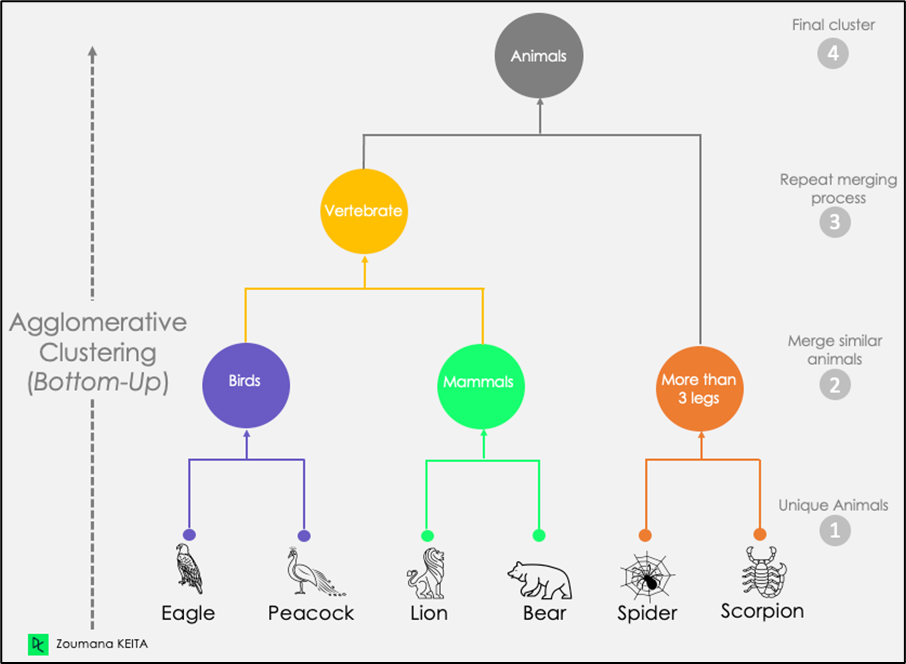

In [41]:
elbow_k

np.int64(5)

In [42]:
from sklearn.cluster import AgglomerativeClustering

In [43]:
agc = AgglomerativeClustering(n_clusters = elbow_k)
labels2 = agc.fit_predict(X_pre)


In [44]:
labels2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [45]:
X2 = X.copy()
X2["Cluster"] = labels2

In [46]:
X2.groupby(by="Cluster").describe().T

Cluster                  0           1          2          3          4
Income   count   32.000000   39.000000  85.000000  21.000000  23.000000
         mean    89.406250   86.538462  55.811765  25.095238  26.304348
         std     16.612975   16.312485   9.731508   7.133756   7.893811
         min     71.000000   69.000000  39.000000  15.000000  15.000000
         25%     78.000000   75.500000  48.000000  19.000000  19.500000
         50%     86.500000   79.000000  57.000000  24.000000  25.000000
         75%     98.250000   95.000000  63.000000  30.000000  33.000000
         max    137.000000  137.000000  79.000000  38.000000  39.000000
Spending count   32.000000   39.000000  85.000000  21.000000  23.000000
         mean    15.593750   82.128205  49.129412  80.047619  20.913043
         std      8.936548    9.364489   7.281399  10.249274  13.017167
         min      1.000000   63.000000  29.000000  61.000000   3.000000
         25%      9.750000   74.500000  43.000000  73.000000   9.500000
         50%     15.000000   83.000000  49.000000  77.000000  17.000000
         75%     20.500000   90.000000  55.000000  87.000000  33.500000
         max     39.000000   97.000000  65.000000  99.000000  40.000000

In [47]:
centroids2 = X2.groupby(by="Cluster").mean()
centroids2


,Income,Spending
Cluster,,
0,89.406250,15.593750
1,86.538462,82.128205
2,55.811765,49.129412
3,25.095238,80.047619
4,26.304348,20.913043


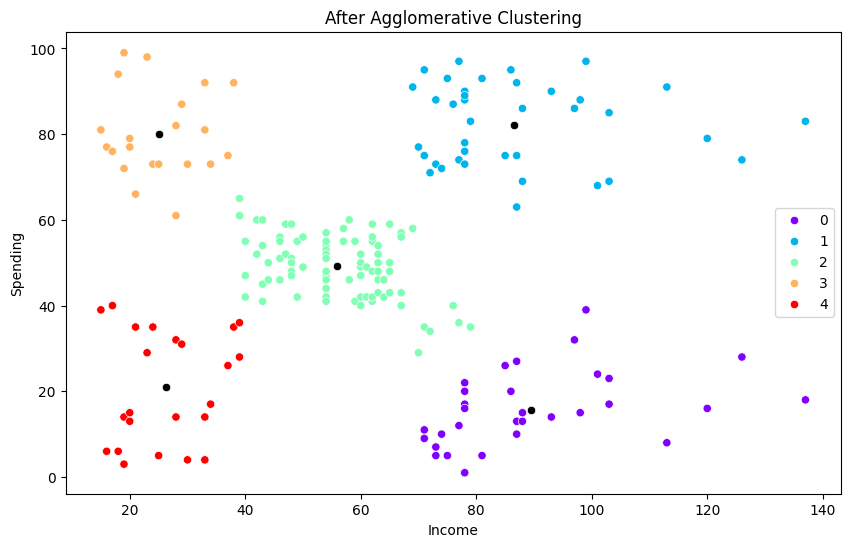

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X2, x="Income", y="Spending", hue="Cluster", palette = "rainbow")
sns.scatterplot(data=centroids2, x="Income", y="Spending", color="black")
plt.title("After Agglomerative Clustering")
plt.show()


In [49]:
X2.to_csv("AGCResults.csv", index=False)